<a href="https://colab.research.google.com/github/mohitbt66/Heart-Disease-Prediction-Using-Machine-Learning/blob/main/Heart_Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import chi2_contingency

# Data preprocessing
from sklearn.model_selection import train_test_split    # Splitting datasets

# Feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler    # Feature scaling
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Model evaluation
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

# Manage warning messages
import warnings
warnings.simplefilter("ignore")     # Ignore all warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/Kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive/


In [ ]:
# Download datasets from Kaggle

! kaggle datasets download data855/heart-disease

Dataset URL: https://www.kaggle.com/datasets/data855/heart-disease
License(s): CC0-1.0


In [ ]:
# Unzip dataset zip file

! unzip heart-disease.zip

Archive:  heart-disease.zip
  inflating: heart.csv               


In [ ]:
# Read the .CSV files into Pandas dataframe
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(f"This dataset has \033[1m{df.shape[0]}\033[0m rows and \033[1m{df.shape[1]}\033[0m columns.")

This dataset has 303 rows and 14 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("\033[1mMissing values in dataset\033[0m")
print(df.isna().sum().sum())

Missing values in dataset
0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


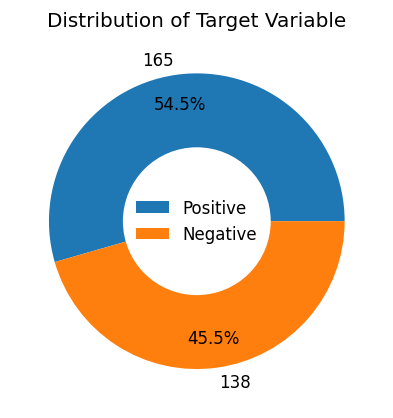

In [ ]:
donut = df["target"].value_counts().reset_index()

labels = ["Positive", "Negative"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Target Variable")
plt.legend(labels, loc="center", frameon=False)
plt.show();

Rename columns for clarity

The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.

We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

Note: I borrowed Rob Harrand's idea of re-naming the columns.

In [ ]:
df = df.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


9 columns (sex, cp, fbs, restecg, exang, slope, ca and thal) are numerical in terms of data type, but categorical in terms of their semantics.

**These features should be converted to string (object) data type for proper analysis and interpretation:**

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 0] = 'normal'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [ ]:
df.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [ ]:
#Summary Statistics for Numerical Variables

df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [ ]:
#Summary Statistics for Categorical Variables

df.describe(include='object')

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,st_slope,thalassemia
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4
top,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,downsloping,normal
freq,207,143,258,152,204,142,166


**Univariate Analysis**

We undertake univariate analysis on the dataset's features, based on their datatype:

**For numerical data:** We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

**For categorical data:** Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

Numerical Variables Univariate Analysis

In [ ]:
# Define the  numerical features
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

# Filter out numerical features for the univariate analysis
df_numerical = df[numerical_features]

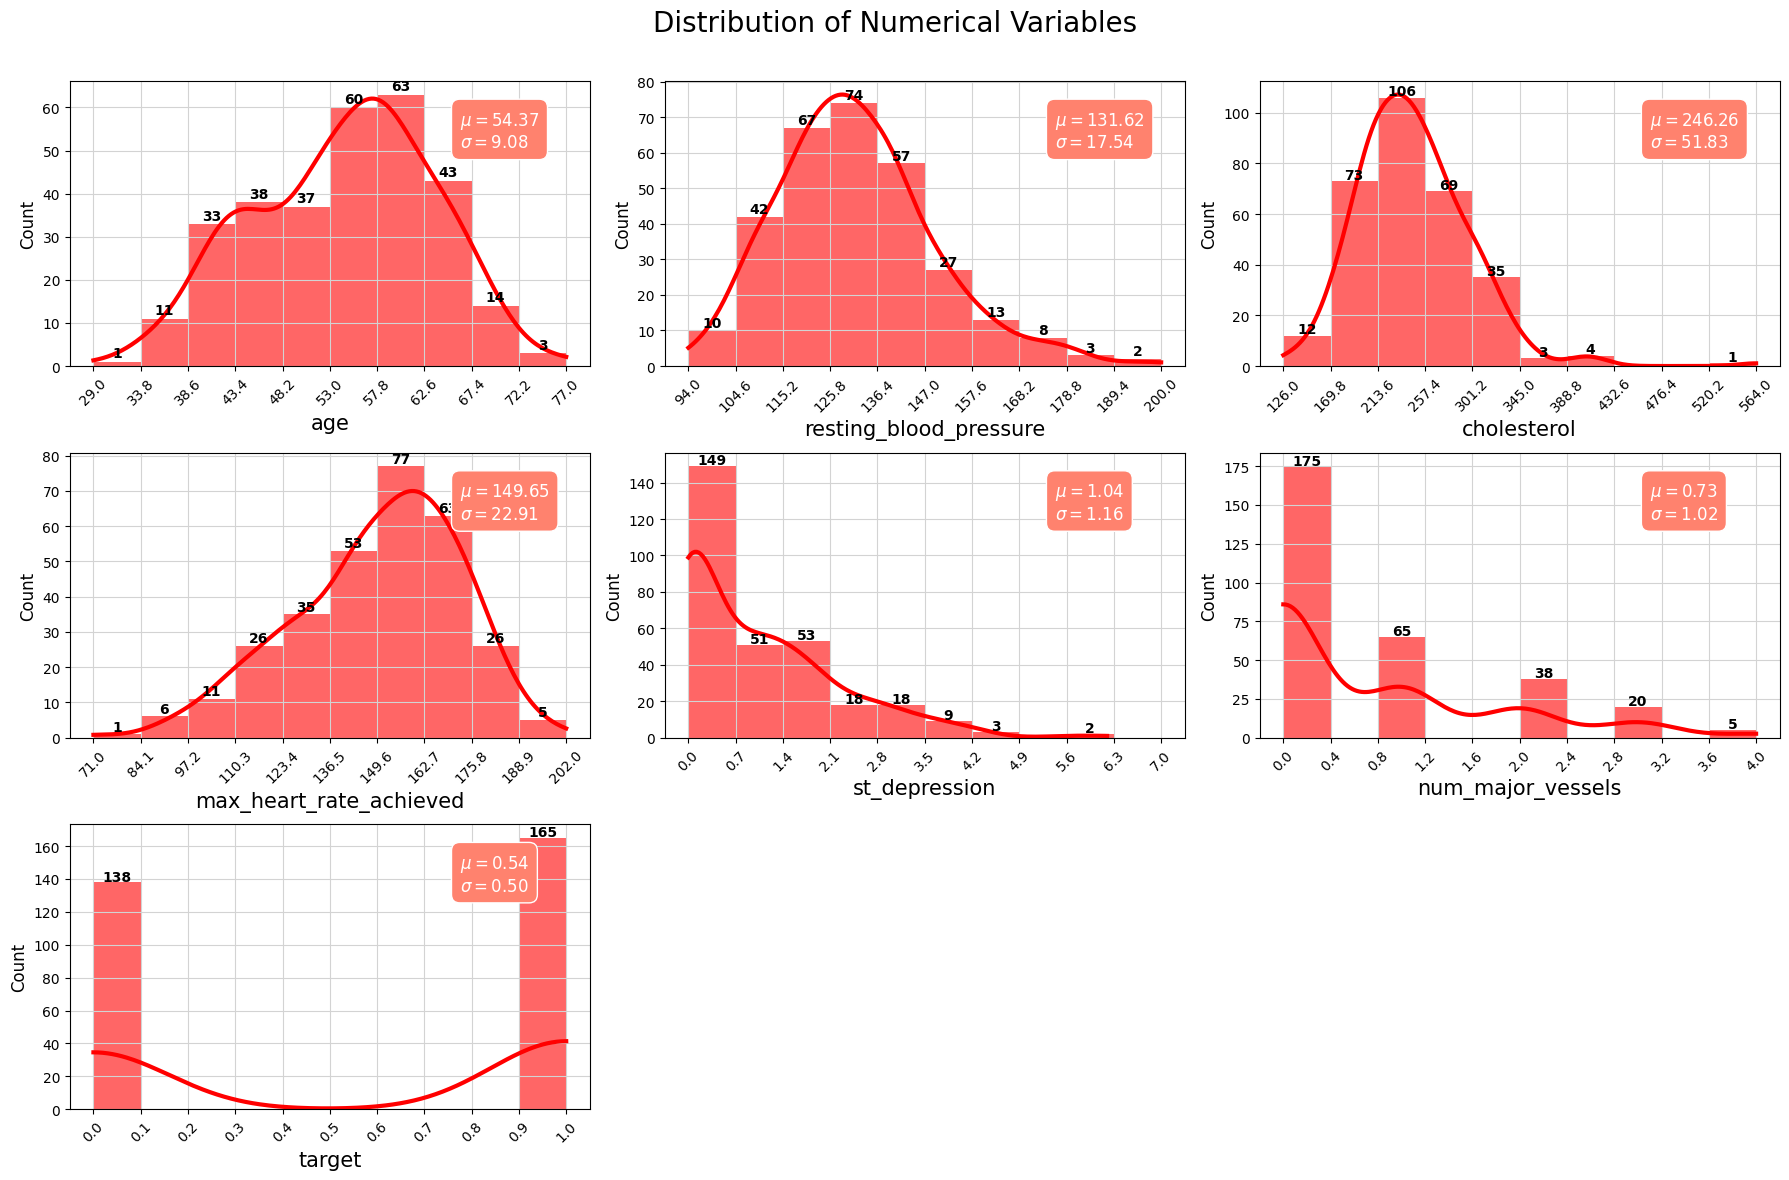

In [ ]:
# Set up the subplot with more axes (3 rows x 3 columns = 9 subplots)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
ax = ax.flatten()  # Flatten to simplify indexing

# Loop through each numerical feature
for i, col in enumerate(df_numerical.columns):
    values, bin_edges = np.histogram(df_numerical[col],
                                     range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))

    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[i],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[i].set_xlabel(col, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')

    for p in graph.patches:
        height = p.get_height()
        if height > 0:
            ax[i].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 1),
                           ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        rf'$\mu={df_numerical[col].mean():.2f}$',
        rf'$\sigma={df_numerical[col].std():.2f}$'
    ))
    ax[i].text(0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=12, verticalalignment='top',
               color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Turn off unused subplots
for j in range(len(df_numerical.columns), len(ax)):
    ax[j].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Categorical Variables Univariate Analysis

In [ ]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(numerical_features)
df_categorical = df[categorical_features]

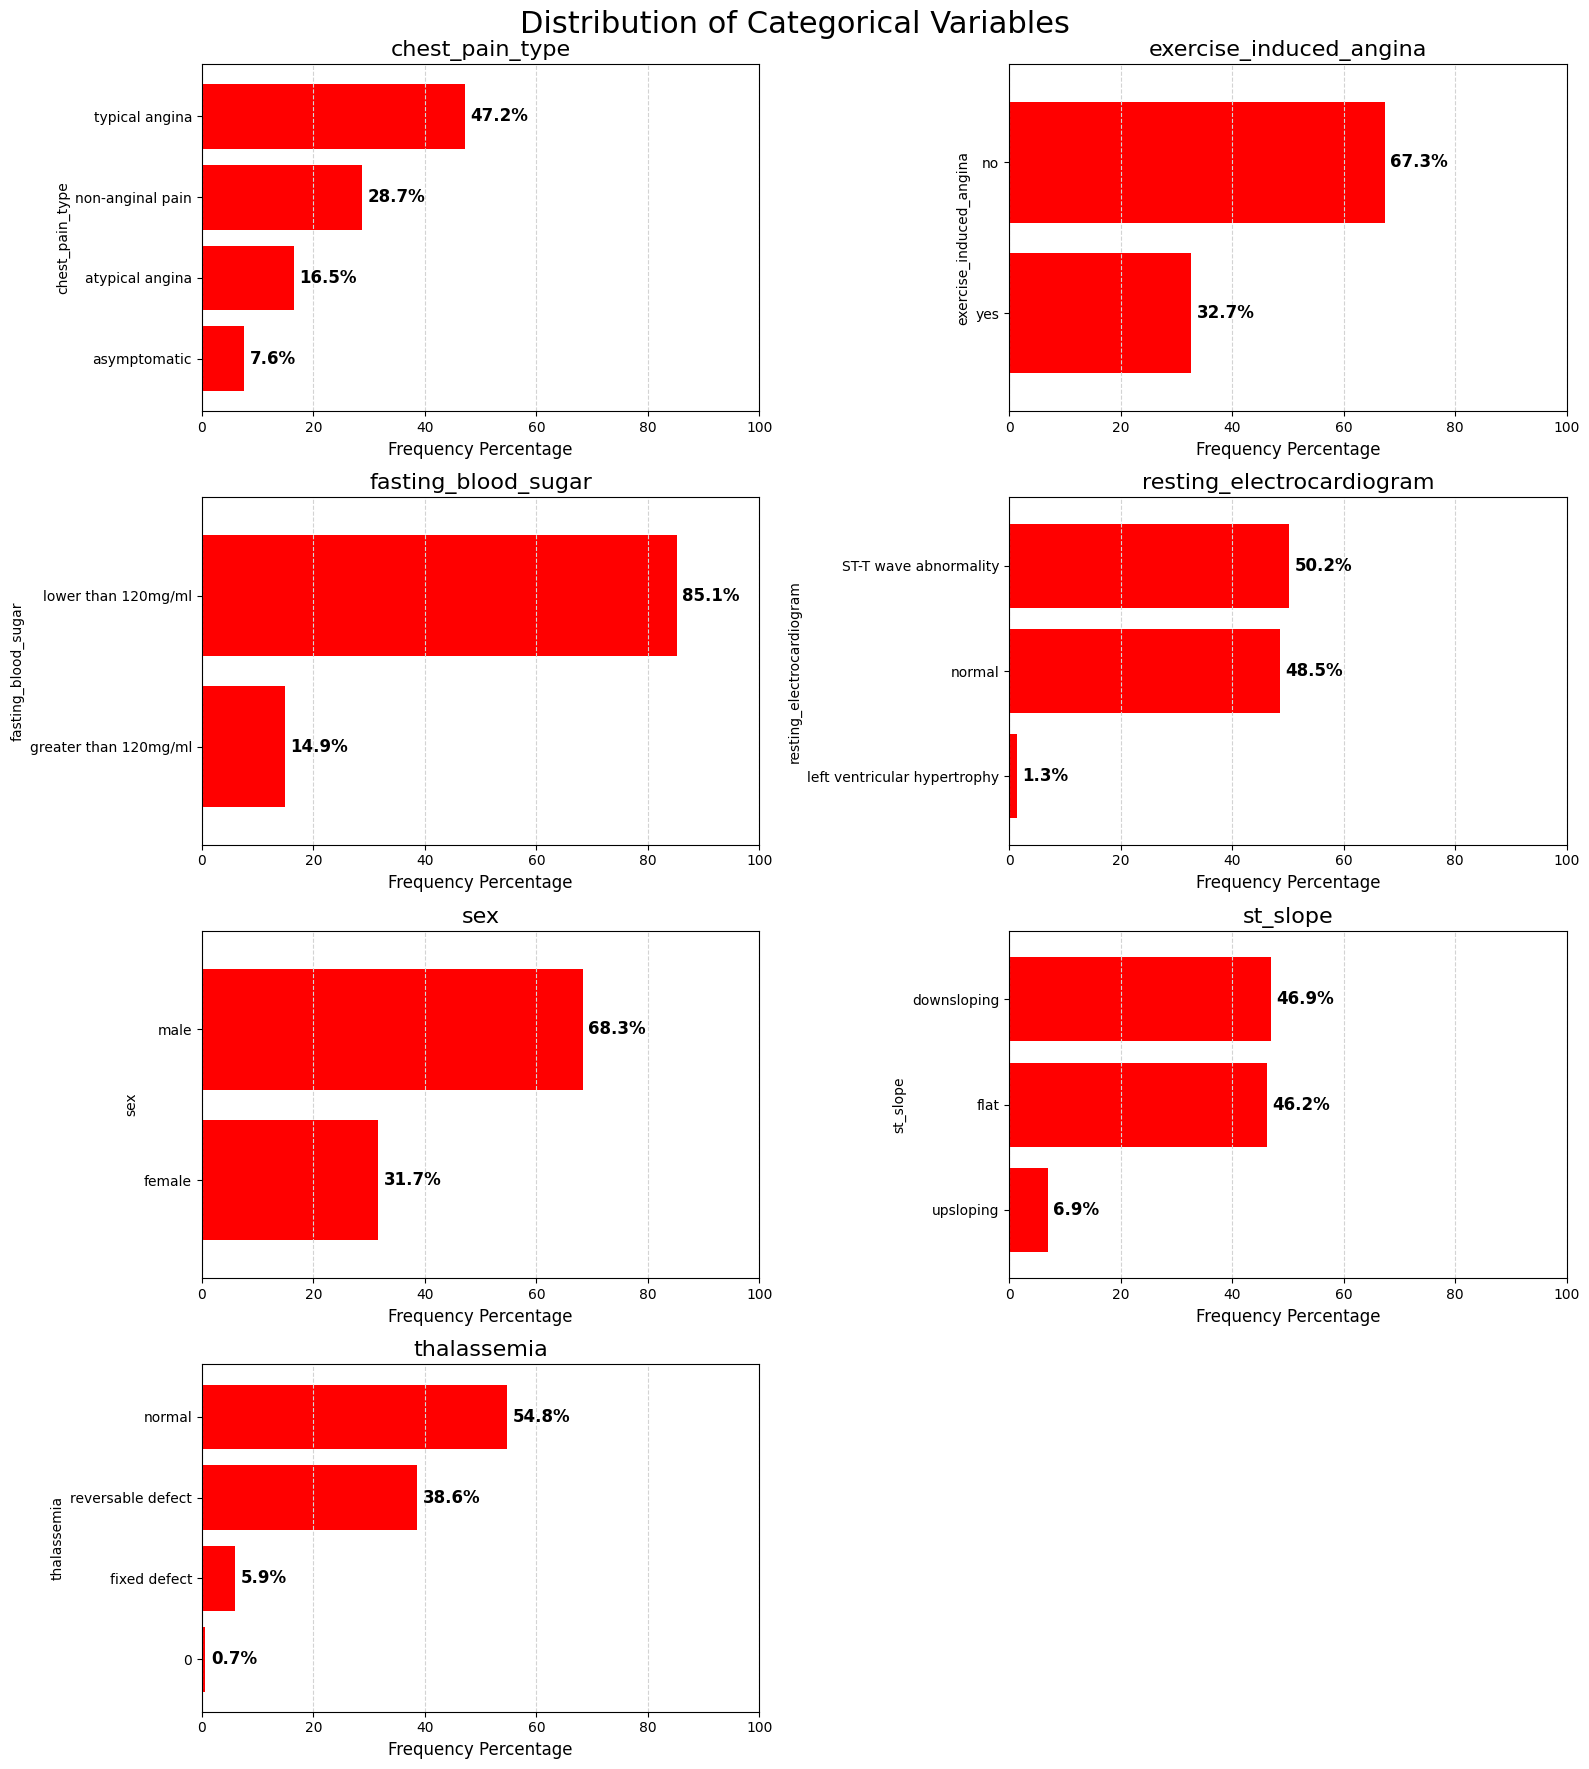

In [ ]:
# Set up the subplot for a 4x2 layout (8 axes total, 1 will be unused)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
ax = ax.flatten()  # Flatten to 1D for easy indexing

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value + 1, index, f'{value:.1f}%', fontsize=12, weight='bold', va='center')

    ax[i].set_xlim([0, 100])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=16)
    ax[i].grid(axis='x', linestyle='--', color='lightgrey')

# Turn off the last unused subplot (8th subplot)
for j in range(len(categorical_features), len(ax)):
    ax[j].axis('off')

# Final adjustments
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Bivariate Analysis

Numerical Features vs Target

In [ ]:
# Remove 'target' from the numerical_features
numerical_features = [feature for feature in numerical_features if feature != 'target']

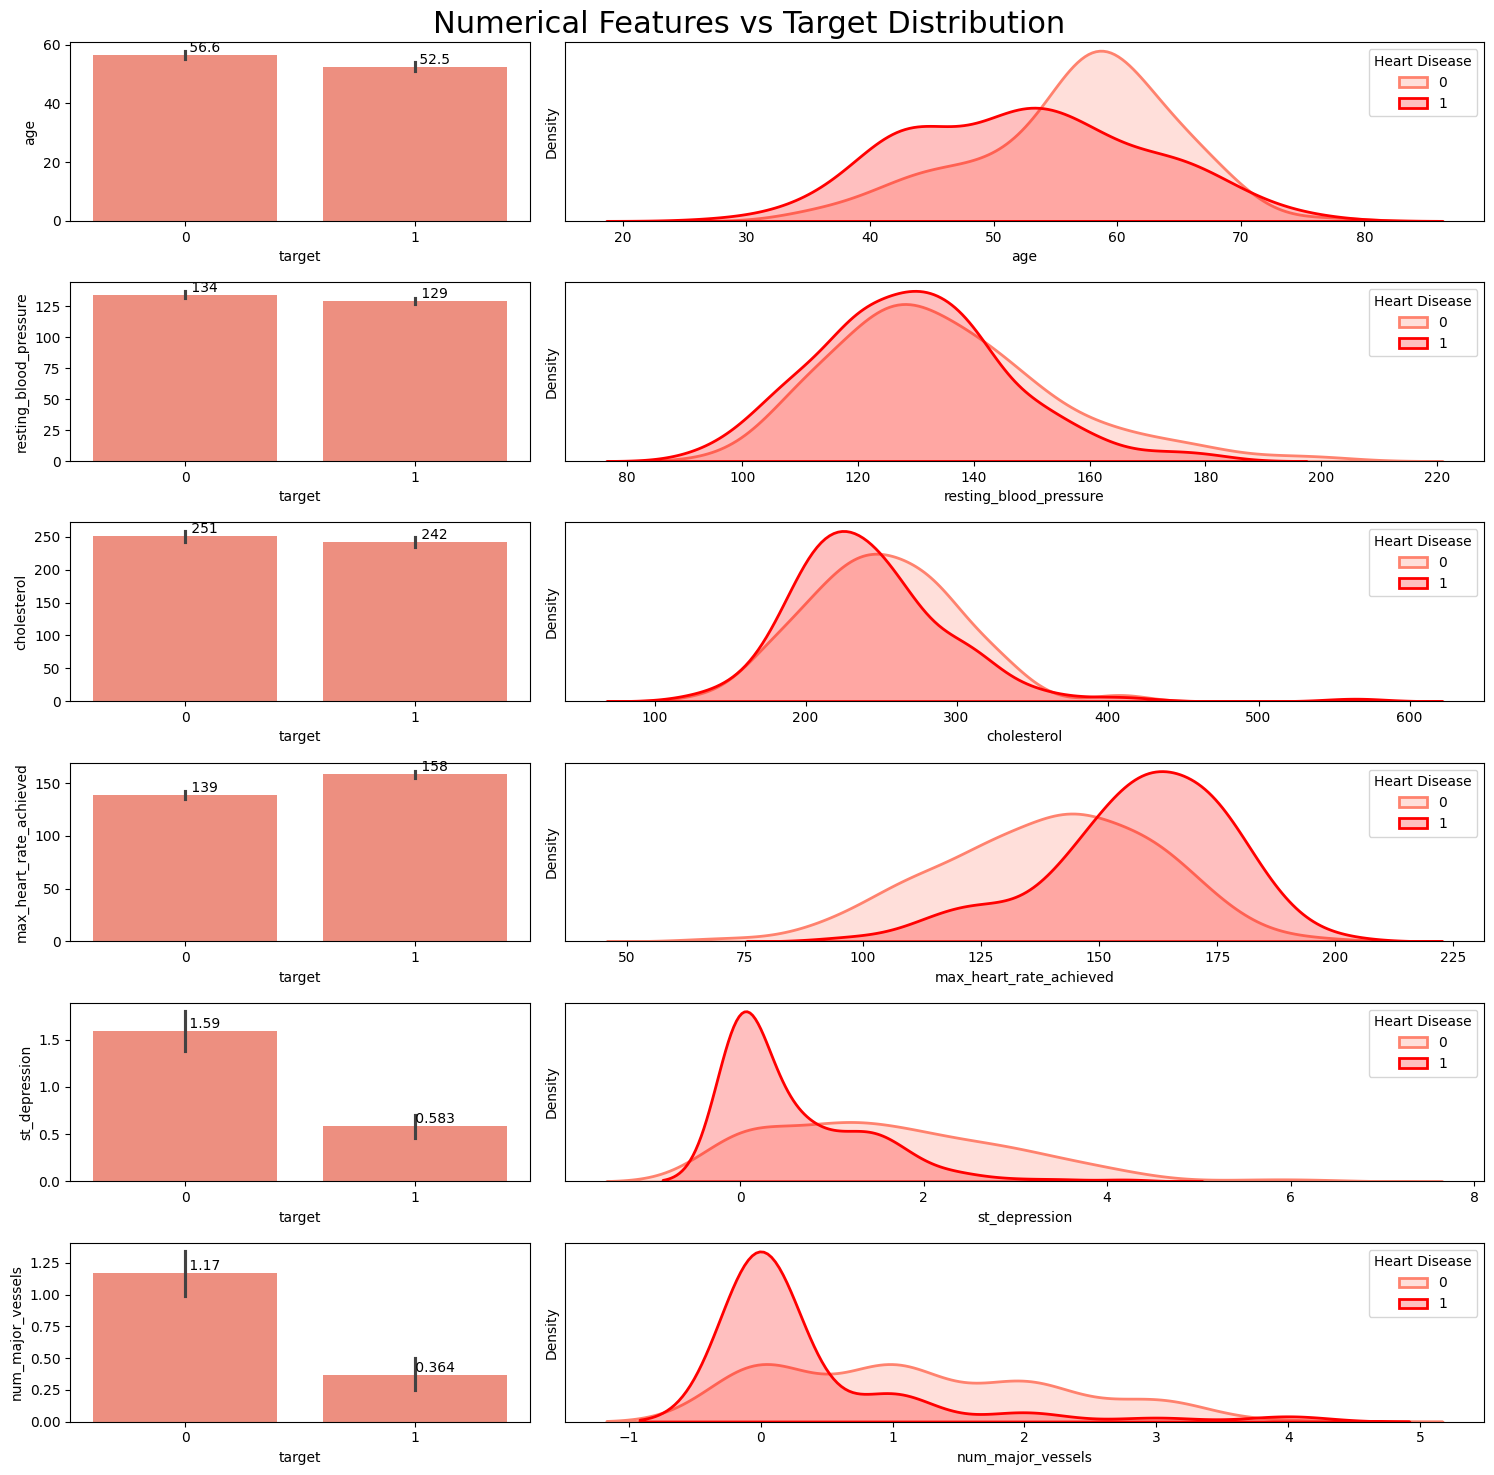

In [ ]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each numerical feature to create barplots and kde plots
for i, col in enumerate(numerical_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

Categorical Features vs Target

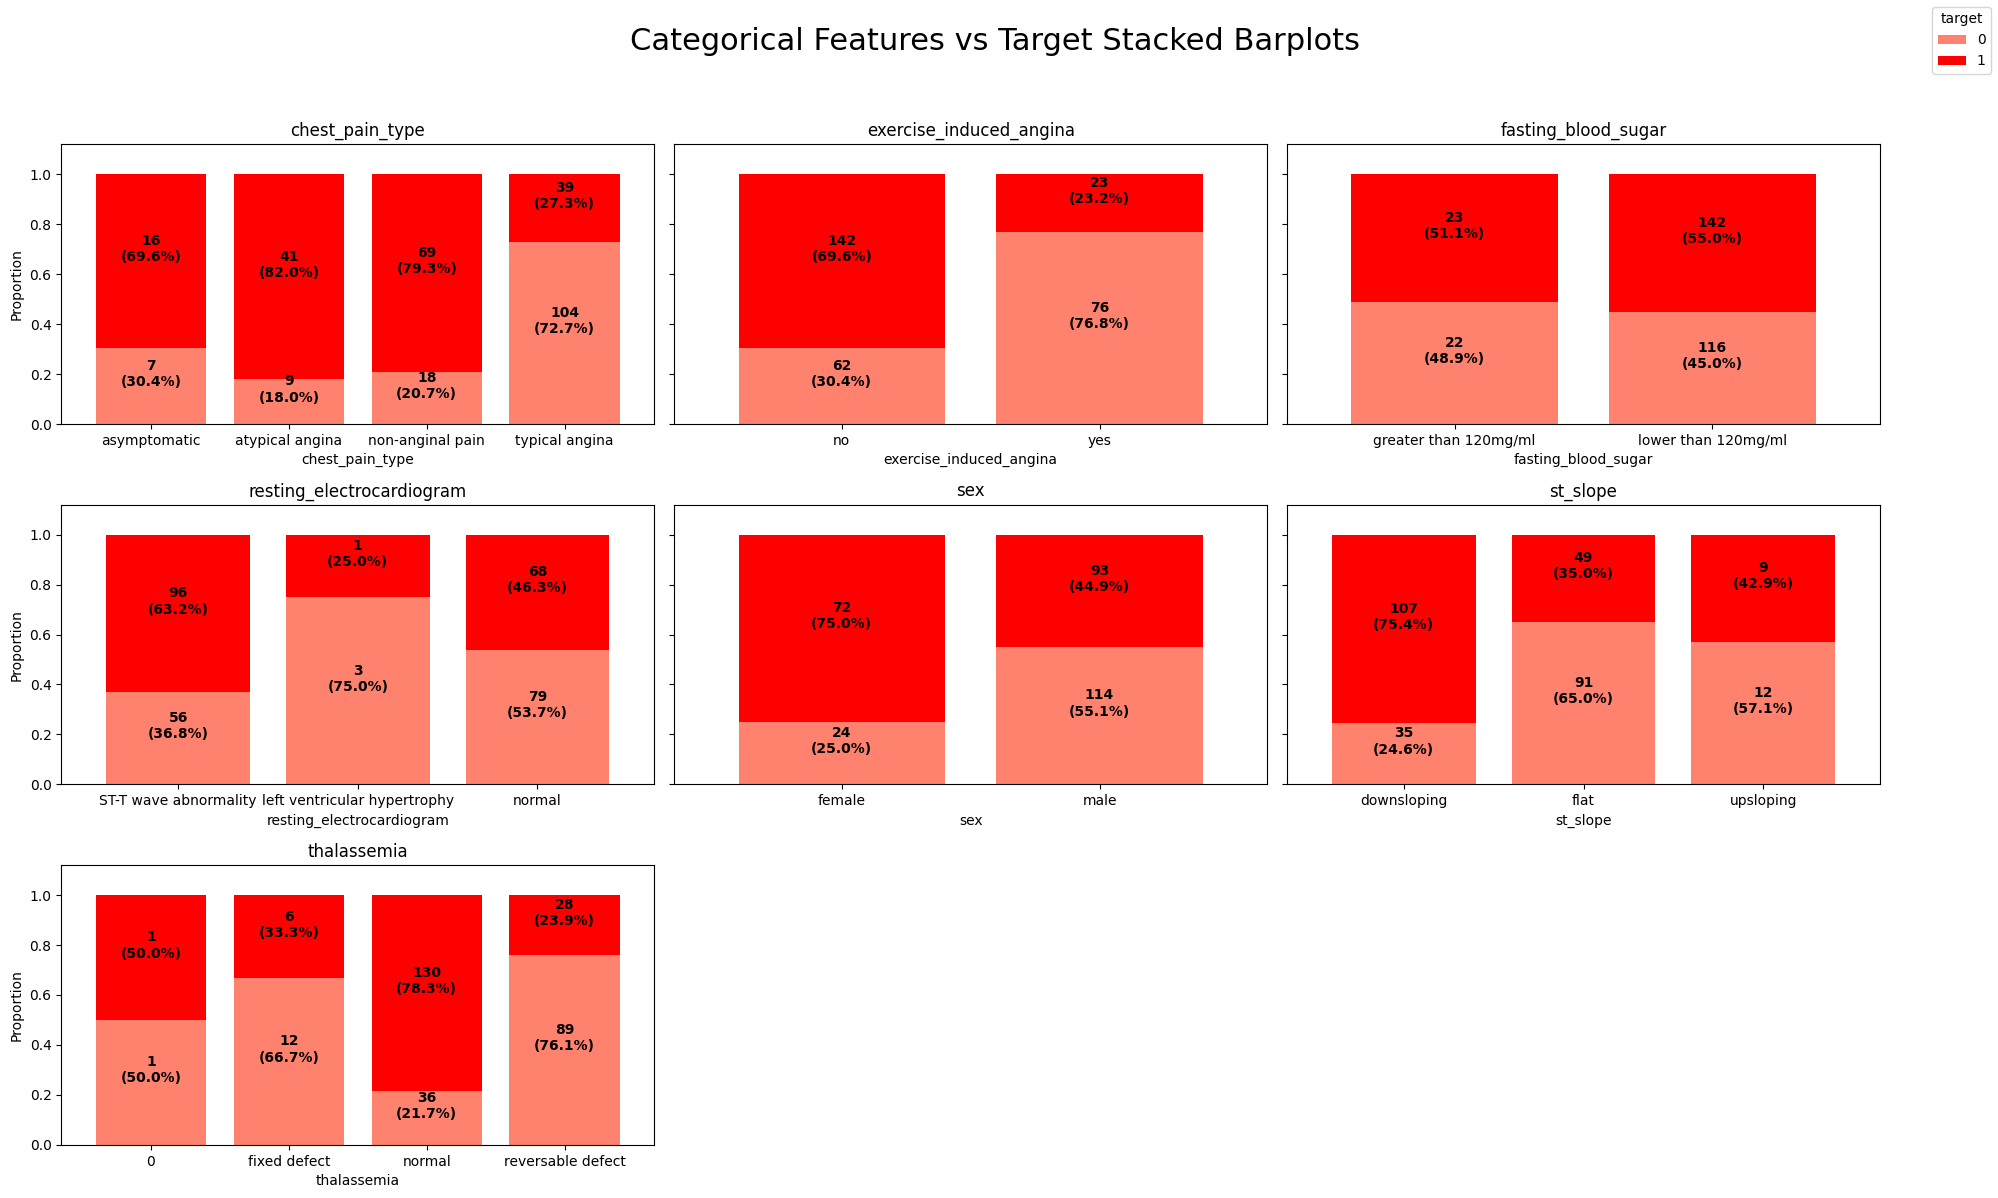

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
ax = ax.flatten()

for i, col in enumerate(categorical_features[:7]):  # Limit to 7 features
    # Create a cross tabulation showing the proportion of target classes
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])

    # Plot stacked bar chart
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add annotations
    for idx, val in enumerate(cross_tab.index.values):
        for proportion, count, y_location in zip(
            cross_tab_prop.loc[val],
            cross_tab.loc[val],
            cross_tab_prop.loc[val].cumsum()
        ):
            ax[i].text(x=idx,
                       y=(y_location - proportion) + (proportion / 2),
                       s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                       color="black", fontsize=10, fontweight="bold", ha='center')

    # Set axis formatting
    ax[i].set_title(col, fontsize=12)
    ax[i].set_ylim([0, 1.12])
    ax[i].tick_params(axis='x', rotation=0)

# Remove the 8th and 9th unused subplots
fig.delaxes(ax[7])
fig.delaxes(ax[8])

# Add one unified legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, title='target', loc='upper right', fontsize=10)

# Super title
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)

# Layout
plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # leave space for suptitle & legend
plt.show()

Categorical Features Encoding

In [ ]:
# Make a copy of the dataframe with one-hot encoded features
df_encoded = pd.get_dummies(df, columns=['chest_pain_type', 'resting_electrocardiogram', 'thalassemia'], drop_first=True)

# List of features to label encode
features_to_label_encode = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'target']

# Apply label encoding
le = LabelEncoder()
for feature in features_to_label_encode:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])

# Convert all boolean columns (from one-hot encoding) to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Final check
print(df_encoded.dtypes)

age                                                         int64
sex                                                         int64
resting_blood_pressure                                      int64
cholesterol                                                 int64
fasting_blood_sugar                                         int64
max_heart_rate_achieved                                     int64
exercise_induced_angina                                     int64
st_depression                                             float64
st_slope                                                    int64
num_major_vessels                                           int64
target                                                      int64
chest_pain_type_atypical angina                             int64
chest_pain_type_non-anginal pain                            int64
chest_pain_type_typical angina                              int64
resting_electrocardiogram_left ventricular hypertrophy      int64
resting_el

In [ ]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_electrocardiogram_left ventricular hypertrophy,resting_electrocardiogram_normal,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,1,145,233,0,150,0,2.3,2,0,1,0,0,0,0,1,1,0,0
1,37,1,130,250,1,187,0,3.5,2,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,1,172,0,1.4,0,0,1,1,0,0,0,1,0,1,0
3,56,1,120,236,1,178,0,0.8,0,0,1,1,0,0,0,0,0,1,0
4,57,0,120,354,1,163,1,0.6,0,0,1,0,0,1,0,0,0,1,0


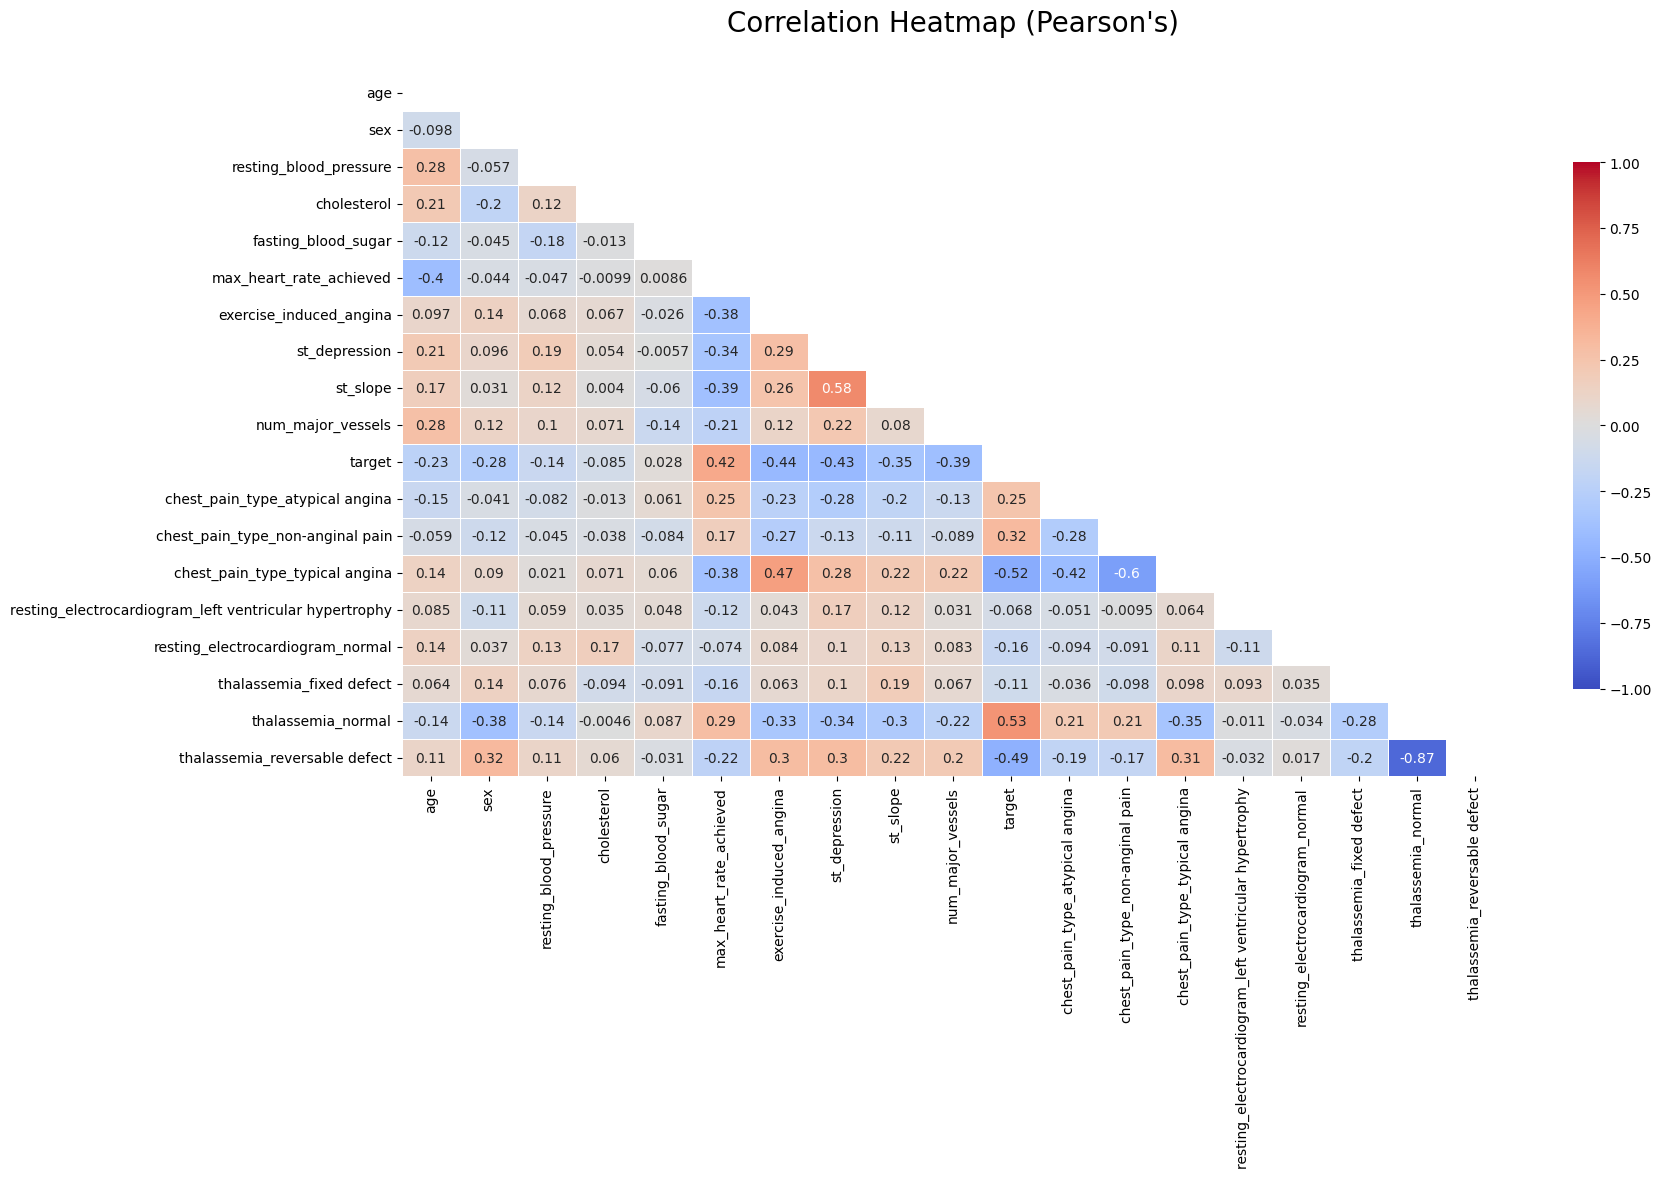

In [ ]:
df_ = df_encoded.copy()

# Compute Pearson correlation matrix
corr = df_.corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Draw the heatmap using the 'coolwarm' colormap
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1.0,
    vmin=-1.0,
    center=0,
    annot=True,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# Add a title
ax.set_title("Correlation Heatmap (Pearson's)", fontsize=20, y=1.05)

# Show the plot
plt.tight_layout()
plt.show()

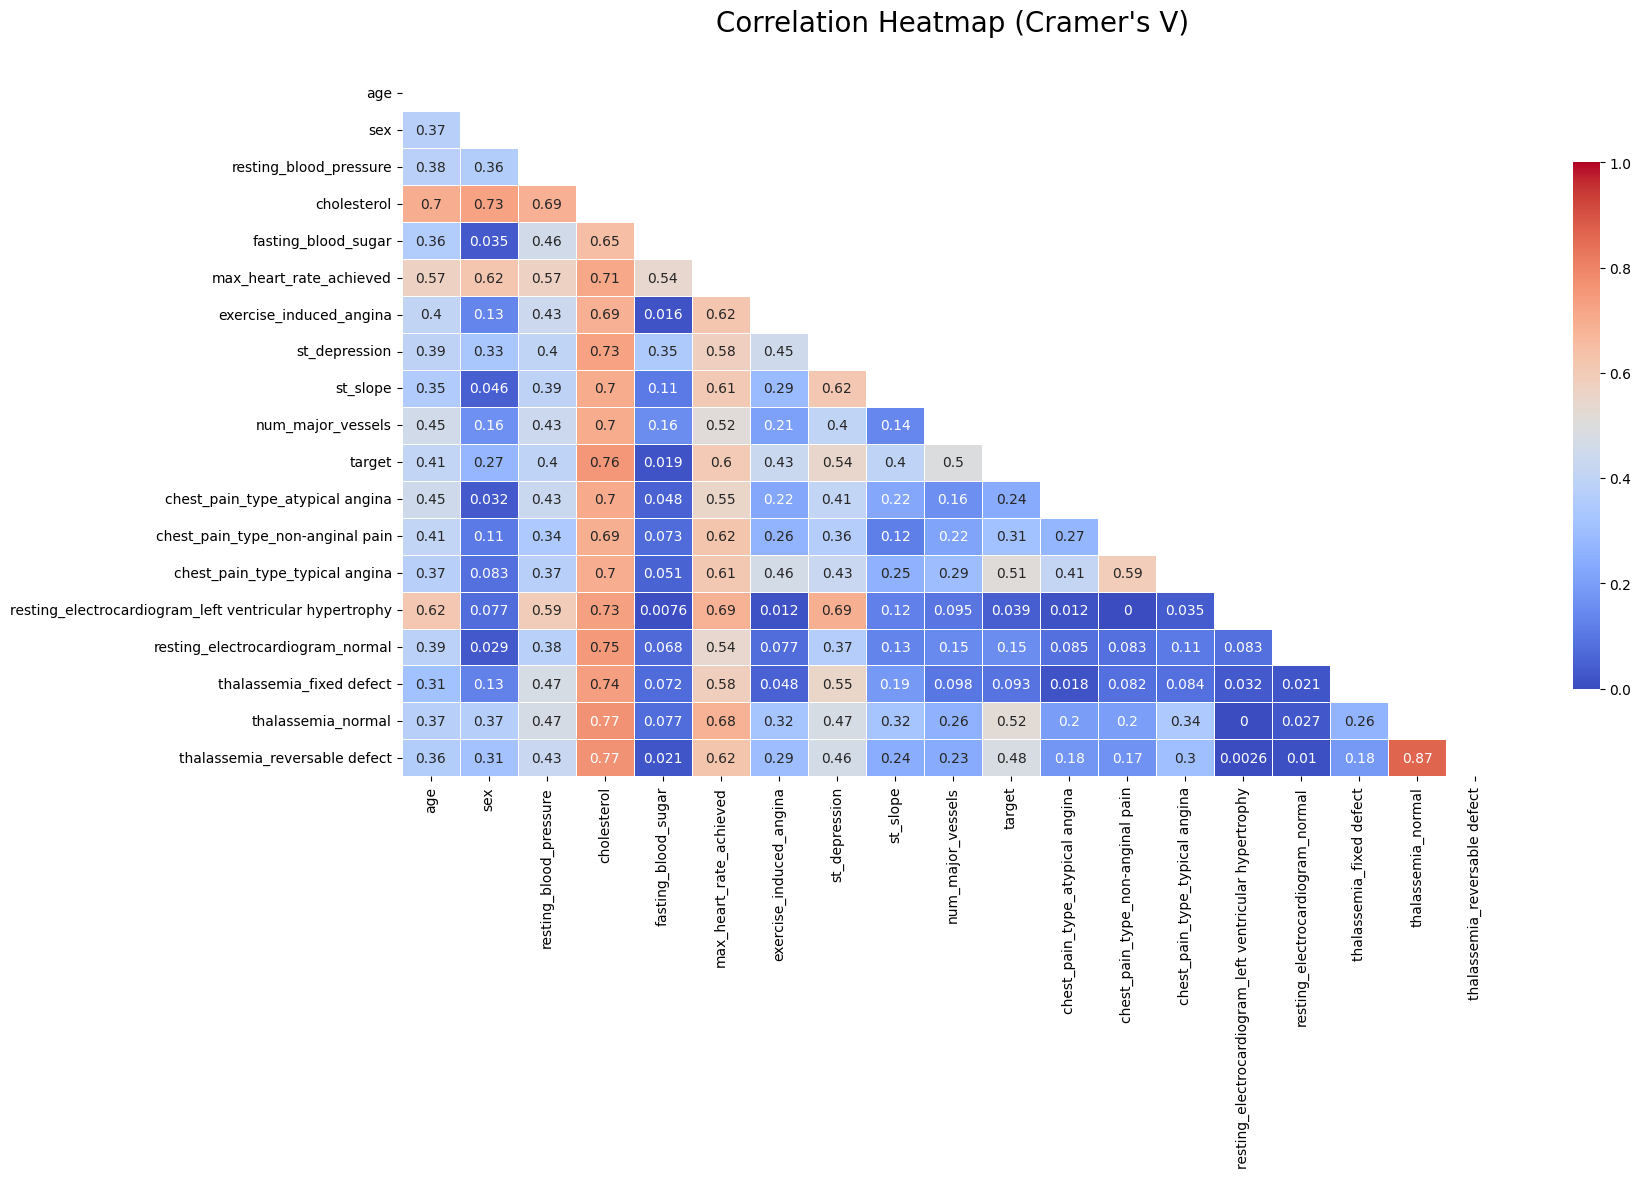

In [ ]:
# Function to compute Cramer's V correlation
def cramers_v(confusion_matrix):
    """
    Calculate Cramer's V correlation coefficient for a given confusion matrix.

    :param confusion_matrix: 2D numpy array or pandas DataFrame representing a contingency table
    :return: Cramer's V value
    """
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()  # Total number of observations
    min_dim = min(confusion_matrix.shape) - 1  # Minimum dimension of the table (rows or columns - 1)

    return np.sqrt(chi2 / (n * min_dim))

# Function to compute the Cramer's V correlation matrix
def cramers_v_matrix(df):
    """
    Compute the Cramer's V correlation matrix for the given DataFrame of categorical variables.

    :param df: DataFrame with categorical variables
    :return: Cramer's V correlation matrix
    """
    # Initialize an empty DataFrame to store Cramer's V values
    v_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    # Loop through each pair of columns
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                # Create a contingency table
                contingency = pd.crosstab(df[col1], df[col2])
                # Compute Cramer's V for the contingency table
                v_matrix.loc[col1, col2] = cramers_v(contingency.values)
            else:
                v_matrix.loc[col1, col2] = 1  # Cramer's V for the same column is 1

    return v_matrix

# Compute Cramer's V correlation matrix
cramers_v_corr = cramers_v_matrix(df_encoded)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cramers_v_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Draw the heatmap using the 'coolwarm' colormap
sns.heatmap(
    cramers_v_corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1.0,
    vmin=0.0,
    annot=True,
    square=False,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# Add a title
ax.set_title("Correlation Heatmap (Cramer's V)", fontsize=20, y=1.05)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Feature Scaling

In [ ]:
# Feature scaling

# Standard Scaling
scaler_x_standard = StandardScaler()
X_train_standard = scaler_x_standard.fit_transform(X_train)
X_test_standard = scaler_x_standard.transform(X_test)

# MinMax Scaling
scaler_x_minmax = MinMaxScaler()
X_train_minmax = scaler_x_minmax.fit_transform(X_train)
X_test_minmax = scaler_x_minmax.transform(X_test)

**[1] Logistic Regression -> LR**

Standard Scaling:

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [ ]:
# Define the base Logistic Regression model
lr_base = LogisticRegression(solver='liblinear', random_state=0)

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_lr, best_lr_hyperparams = tune_clf_hyperparameters(lr_base, param_grid_lr, X_train_standard, y_train)

print('Logistic Regression Optimal Hyperparameters:\n', best_lr_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_lr.predict(X_train_standard)))

Logistic Regression Optimal Hyperparameters:
 {'C': 1, 'penalty': 'l2'}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.84      0.89      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_lr.predict(X_test_standard)))

# Calculate recall
LR_recall = recall_score(y_test, best_lr.predict(X_test_standard))

print('Logistic Regression Model recall for Standard Scaling is: {:.2f}%'.format(LR_recall * 100))

# Calculate probabilities for positive class
y_probs_LR = best_lr.predict_proba(X_test_standard)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test, y_probs_LR)

print('AUC - Logistic Regression Model for Standard Scaling: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Logistic Regression Model recall for Standard Scaling is: 87.88%
AUC - Logistic Regression Model for Standard Scaling: 0.89


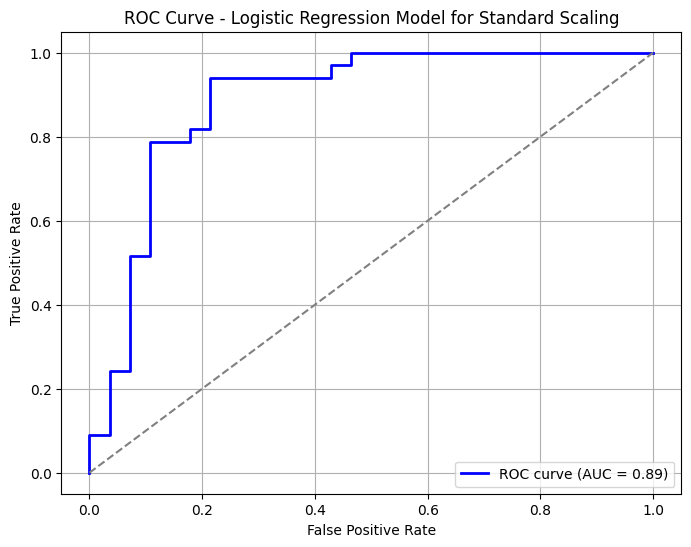

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model for Standard Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

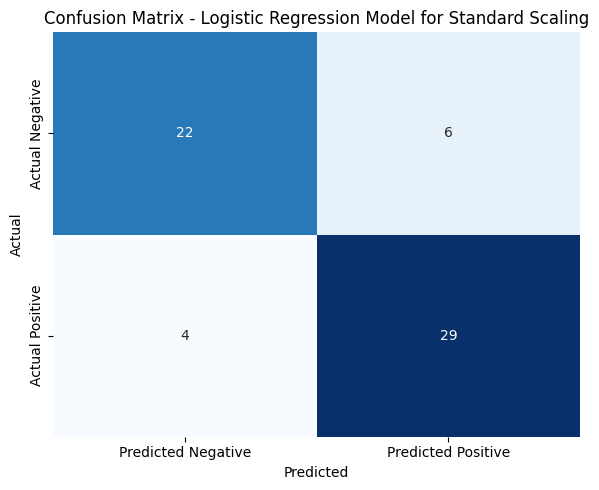

In [ ]:
# Generate confusion matrix
cm_lr = confusion_matrix(y_test, best_lr.predict(X_test_standard))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model for Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_lr = classification_report(y_test, best_lr.predict(X_test_standard), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_lr['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_lr['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_lr['1']['f1-score'], 2)
accuracy = round(classification_report_dict_lr['accuracy'], 2)
auc_LR = round(auc_LR, 2)

# Create a DataFrame for the metrics
metrics_lr_ss = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_LR]
})

print('Logistic Regression Model Performance for Standard Scaling:')
print(metrics_lr_ss)

Logistic Regression Model Performance for Standard Scaling:
                Metric  Value
0  Precision (Class 1)   0.79
1     Recall (Class 1)   0.94
2   F1-Score (Class 1)   0.86
3             Accuracy   0.84
4                  AUC   0.89


MinMax Scaling

In [ ]:
# Define the base Logistic Regression model
lr_base = LogisticRegression(solver='liblinear', random_state=0)

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_lr, best_lr_hyperparams = tune_clf_hyperparameters(lr_base, param_grid_lr, X_train_minmax, y_train)

print('Logistic Regression Optimal Hyperparameters:\n', best_lr_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_lr.predict(X_train_minmax)))

Logistic Regression Optimal Hyperparameters:
 {'C': 10, 'penalty': 'l2'}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.84      0.88      0.86       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_lr.predict(X_test_minmax)))

# Calculate recall
LR_recall = recall_score(y_test, best_lr.predict(X_test_minmax))

print('Logistic Regression Model recall for MinMax Scaling is: {:.2f}%'.format(LR_recall * 100))

# Calculate probabilities for positive class
y_probs_LR = best_lr.predict_proba(X_test_minmax)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test, y_probs_LR)

print('AUC - Logistic Regression Model for MinMax Scaling: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Logistic Regression Model recall for MinMax Scaling is: 84.85%
AUC - Logistic Regression Model for MinMax Scaling: 0.89


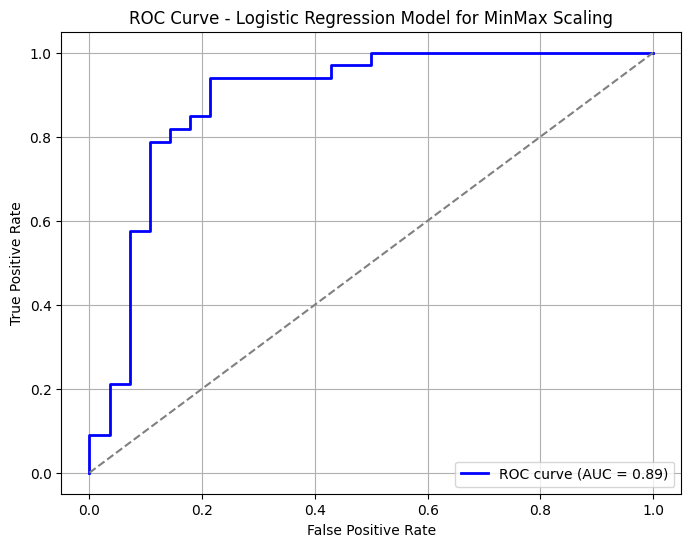

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model for MinMax Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

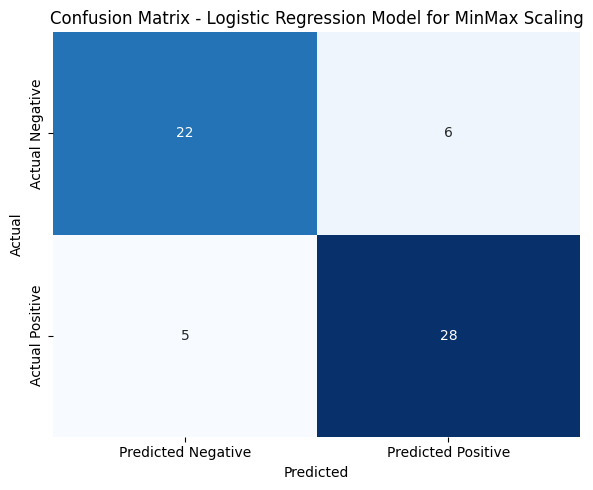

In [ ]:
# Generate confusion matrix
cm_lr = confusion_matrix(y_test, best_lr.predict(X_test_minmax))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model for MinMax Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_lr = classification_report(y_test, best_lr.predict(X_test_minmax), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_lr['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_lr['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_lr['1']['f1-score'], 2)
accuracy = round(classification_report_dict_lr['accuracy'], 2)
auc_LR = round(auc_LR, 2)

# Create a DataFrame for the metrics
metrics_lr_ms = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_LR]
})

print('Logistic Regression Model Performance for MinMax Scaling:')
print(metrics_lr_ms)

Logistic Regression Model Performance for MinMax Scaling:
                Metric  Value
0  Precision (Class 1)   0.82
1     Recall (Class 1)   0.85
2   F1-Score (Class 1)   0.84
3             Accuracy   0.82
4                  AUC   0.89


**[2] Decision Tree Model (ID3)**

Standard Scaling

In [ ]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       110
           1       0.72      0.93      0.81       132

    accuracy                           0.77       242
   macro avg       0.80      0.75      0.75       242
weighted avg       0.79      0.77      0.76       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test_standard)))

# Calculate recall
DT_recall = recall_score(y_test, best_dt.predict(X_test_standard))

print('Decision Tree Classifier recall for Standard Scaling is: {:.2f}%'.format(DT_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = best_dt.predict_proba(X_test_standard)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test, y_probs_DT)

print('AUC - Decision Tree Classifier for Standard Scaling: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61

Decision Tree Classifier recall for Standard Scaling is: 96.97%
AUC - Decision Tree Classifier for Standard Scaling: 0.82


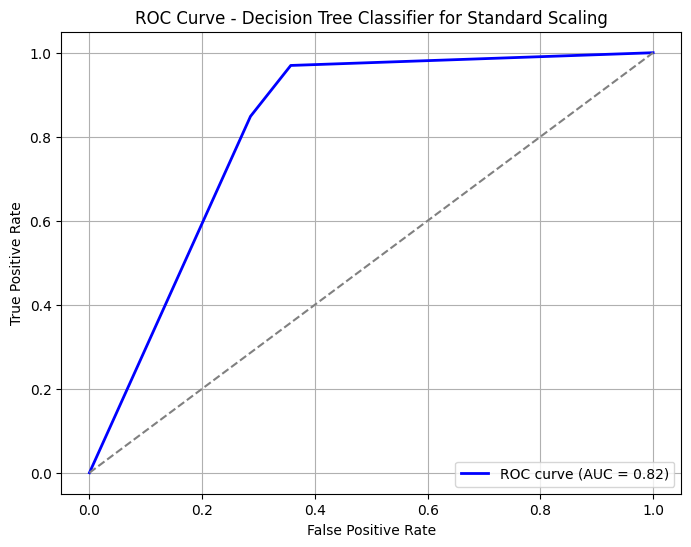

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier for Standard Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

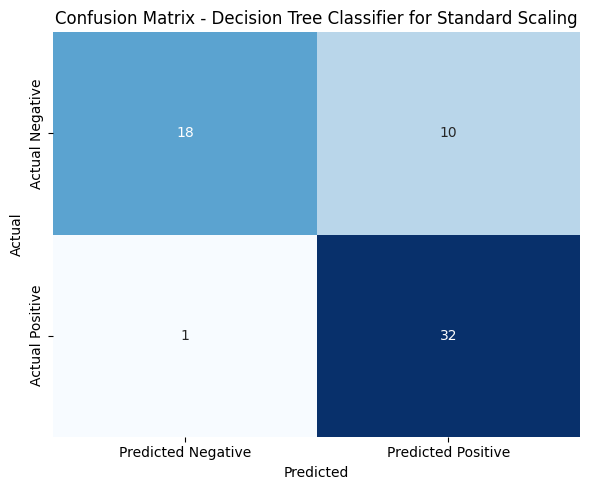

In [ ]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, best_dt.predict(X_test_standard))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier for Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_dt = classification_report(y_test, best_dt.predict(X_test_standard), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_dt['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_dt['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_dt['1']['f1-score'], 2)
accuracy = round(classification_report_dict_dt['accuracy'], 2)
auc_DT = round(auc_DT, 2)

# Create a DataFrame for the metrics
metrics_dt_ss = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_DT]
})

print('Decision Tree Classifier Performance for Standard Scaling:')
# Print the DataFrame
print(metrics_dt_ss)

Decision Tree Classifier Performance for Standard Scaling:
                Metric  Value
0  Precision (Class 1)   0.76
1     Recall (Class 1)   0.97
2   F1-Score (Class 1)   0.85
3             Accuracy   0.82
4                  AUC   0.82


MinMax Scaling

In [ ]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train_minmax, y_train)

print('Decision Tree Classifier Optimal Hyperparameters:\n', best_dt_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train_minmax)))

Decision Tree Classifier Optimal Hyperparameters:
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       110
           1       0.72      0.93      0.81       132

    accuracy                           0.77       242
   macro avg       0.80      0.75      0.75       242
weighted avg       0.79      0.77      0.76       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test_minmax)))

# Calculate recall
DT_recall = recall_score(y_test, best_dt.predict(X_test_minmax))

print('Decision Tree Classifier recall for MinMax Scaling is: {:.2f}%'.format(DT_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = best_dt.predict_proba(X_test_minmax)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test, y_probs_DT)

print('AUC - Decision Tree Classifier for MinMax Scaling: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61

Decision Tree Classifier recall for MinMax Scaling is: 96.97%
AUC - Decision Tree Classifier for MinMax Scaling: 0.82


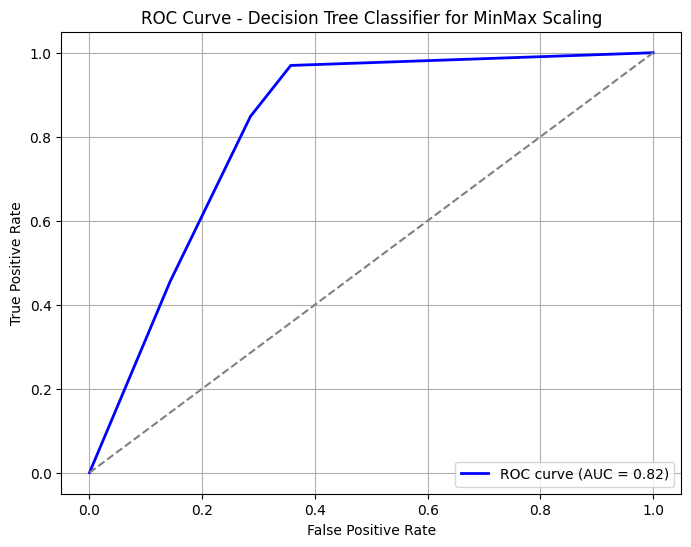

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier for MinMax Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

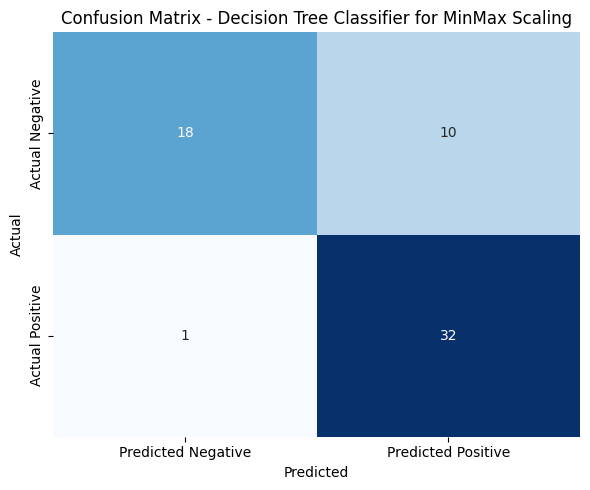

In [ ]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, best_dt.predict(X_test_minmax))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier for MinMax Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_dt = classification_report(y_test, best_dt.predict(X_test_minmax), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_dt['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_dt['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_dt['1']['f1-score'], 2)
accuracy = round(classification_report_dict_dt['accuracy'], 2)
auc_DT = round(auc_DT, 2)

# Create a DataFrame for the metrics
metrics_dt_ms = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_DT]
})

print('Decision Tree Classifier Performance for MinMax Scaling:')
# Print the DataFrame
print(metrics_dt_ms)

Decision Tree Classifier Performance for MinMax Scaling:
                Metric  Value
0  Precision (Class 1)   0.76
1     Recall (Class 1)   0.97
2   F1-Score (Class 1)   0.85
3             Accuracy   0.82
4                  AUC   0.82


**[3] XGB Classifier**

Standard Scaling:

In [ ]:
# Define the base XGB model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Hyperparameter grid for XGB
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train_standard, y_train)

print('XGBoost Optimal Hyperparameters:\n', best_xgb_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_xgb.predict(X_train_standard)))

XGBoost Optimal Hyperparameters:
 {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       110
           1       0.80      0.95      0.87       132

    accuracy                           0.84       242
   macro avg       0.86      0.83      0.84       242
weighted avg       0.86      0.84      0.84       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_xgb.predict(X_test_standard)))

# Calculate recall
XGB_recall = recall_score(y_test, best_xgb.predict(X_test_standard))

print('XGBoost Model recall for Standard Scaling is: {:.2f}%'.format(XGB_recall * 100))

# Calculate ROC curve and AUC
y_probs_XGB = best_xgb.predict_proba(X_test_standard)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_XGB)
auc_XGB = roc_auc_score(y_test, y_probs_XGB)

print('AUC - XGBoost Model for Standard Scaling: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

XGBoost Model recall for Standard Scaling is: 93.94%
AUC - XGBoost Model for Standard Scaling: 0.90


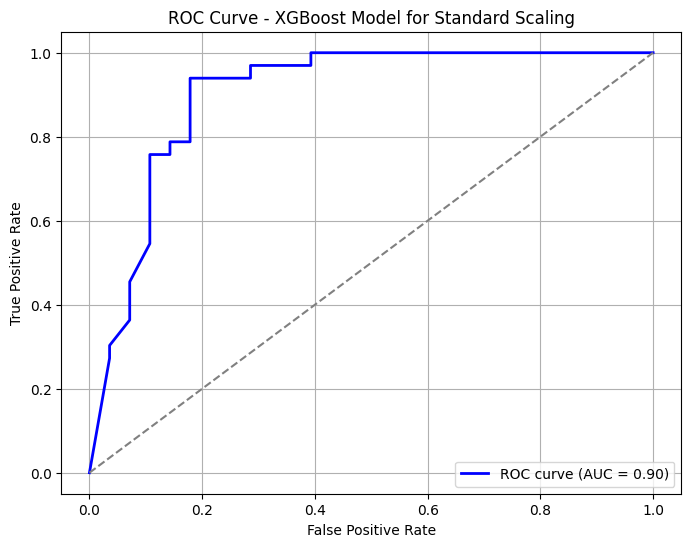

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model for Standard Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

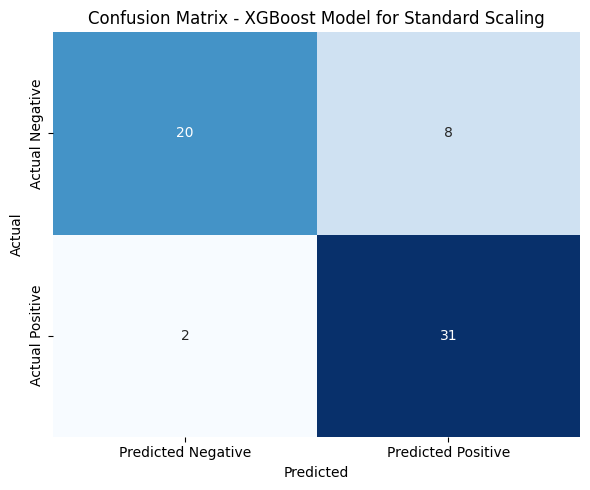

In [ ]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, best_xgb.predict(X_test_standard))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Model for Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_xgb = classification_report(y_test, best_xgb.predict(X_test_standard), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_xgb['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_xgb['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_xgb['1']['f1-score'], 2)
accuracy = round(classification_report_dict_xgb['accuracy'], 2)
auc_XGB = round(auc(fpr, tpr), 2)

# Create a DataFrame for the metrics
metrics_xgb_ss = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_XGB]
})

print('XGBoost Model Performance for Standard Scaling:')
print(metrics_xgb_ss)

XGBoost Model Performance for Standard Scaling:
                Metric  Value
0  Precision (Class 1)   0.79
1     Recall (Class 1)   0.94
2   F1-Score (Class 1)   0.86
3             Accuracy   0.84
4                  AUC   0.90


MinMax Scaling

In [ ]:
# Define the base XGB model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Hyperparameter grid for XGB
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train_minmax, y_train)

print('XGBoost Optimal Hyperparameters:\n', best_xgb_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_xgb.predict(X_train_minmax)))

XGBoost Optimal Hyperparameters:
 {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       110
           1       0.80      0.95      0.87       132

    accuracy                           0.84       242
   macro avg       0.86      0.83      0.84       242
weighted avg       0.86      0.84      0.84       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_xgb.predict(X_test_minmax)))

# Calculate recall
XGB_recall = recall_score(y_test, best_xgb.predict(X_test_minmax))

print('XGBoost Model recall for MinMax Scaling is: {:.2f}%'.format(XGB_recall * 100))

# Calculate ROC curve and AUC
y_probs_XGB = best_xgb.predict_proba(X_test_minmax)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_XGB)
auc_XGB = roc_auc_score(y_test, y_probs_XGB)

print('AUC - XGBoost Model for MinMax Scaling: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

XGBoost Model recall for MinMax Scaling is: 93.94%
AUC - XGBoost Model for MinMax Scaling: 0.90


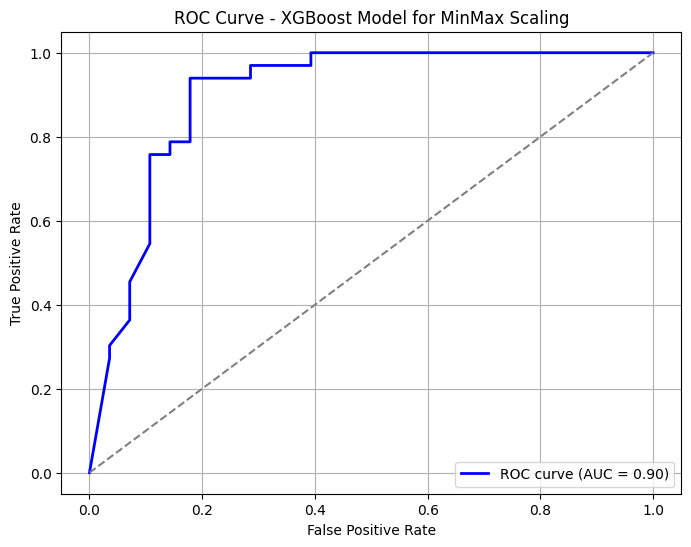

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model for MinMax Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

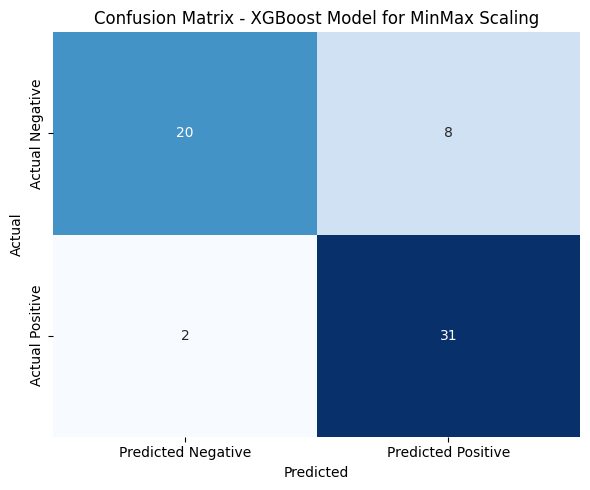

In [ ]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, best_xgb.predict(X_test_minmax))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Model for MinMax Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_xgb = classification_report(y_test, best_xgb.predict(X_test_minmax), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_xgb['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_xgb['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_xgb['1']['f1-score'], 2)
accuracy = round(classification_report_dict_xgb['accuracy'], 2)
auc_XGB = round(auc_XGB, 2)

# Create a DataFrame for the metrics
metrics_xgb_ms = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_XGB]
})

print('XGBoost Model Performance for MinMax Scaling:')
print(metrics_xgb_ms)

XGBoost Model Performance for MinMax Scaling:
                Metric  Value
0  Precision (Class 1)   0.79
1     Recall (Class 1)   0.94
2   F1-Score (Class 1)   0.86
3             Accuracy   0.84
4                  AUC   0.90


**[4] Random Forest Classifier**

Standard Scaling

In [ ]:
rf_base = RandomForestClassifier(random_state=0)

param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train_standard, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train_standard)))

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70}
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.89      0.94      0.92       132

    accuracy                           0.90       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.90      0.90       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test_standard)))

# Calculate recall
RF_recall = recall_score(y_test, best_rf.predict(X_test_standard))

print('Random Forest Classifier recall for Standard Scaling is: {:.2f}%'.format(RF_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = best_rf.predict_proba(X_test_standard)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test, y_probs_RF)

print('AUC - Random Forest Classifier for Standard Scaling: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Random Forest Classifier recall for Standard Scaling is: 87.88%
AUC - Random Forest Classifier for Standard Scaling: 0.90


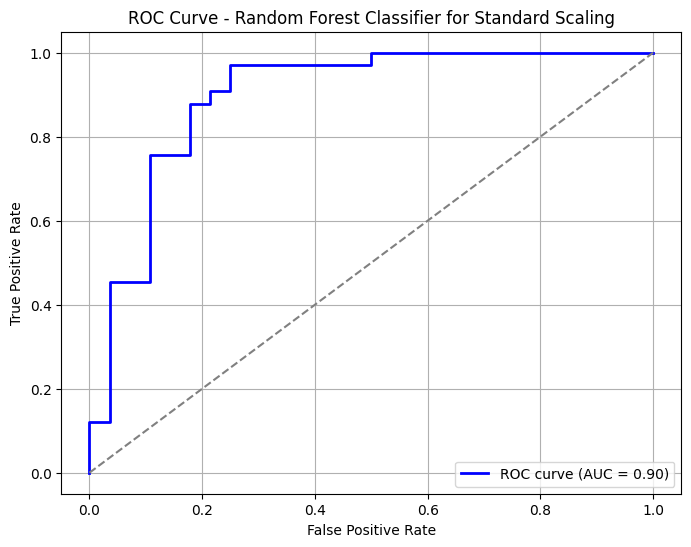

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier for Standard Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

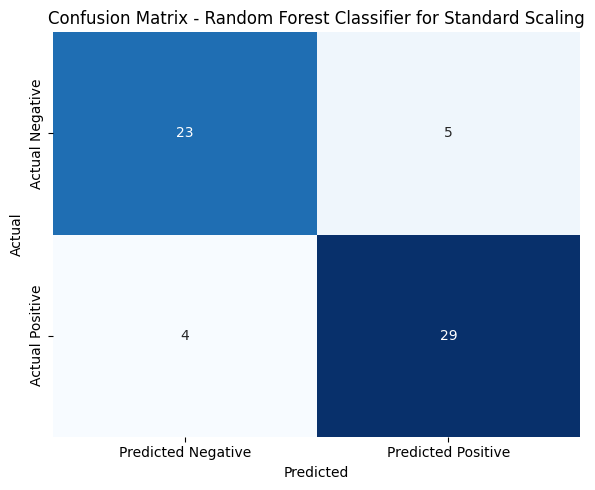

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test_standard))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier for Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_rf = classification_report(y_test, best_rf.predict(X_test_standard), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_rf['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_rf['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_rf['1']['f1-score'], 2)
accuracy = round(classification_report_dict_rf['accuracy'], 2)
auc_RF = round(auc(fpr, tpr), 2)

# Create a DataFrame for the metrics
metrics_rf_ss = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_RF]
})

print('Random Forest Classifier Performance for Standard Scaling:')
# Print the DataFrame
print(metrics_rf_ss)

Random Forest Classifier Performance for Standard Scaling:
                Metric  Value
0  Precision (Class 1)   0.85
1     Recall (Class 1)   0.88
2   F1-Score (Class 1)   0.87
3             Accuracy   0.85
4                  AUC   0.90


MinMax Scaling

In [ ]:
rf_base = RandomForestClassifier(random_state=0)

param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train_minmax, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train_minmax)))

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       110
           1       0.90      0.93      0.91       132

    accuracy                           0.90       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.90      0.90       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test_minmax)))

# Calculate recall
RF_recall = recall_score(y_test, best_rf.predict(X_test_minmax))

print('Random Forest Classifier recall for MinMax Scaling is: {:.2f}%'.format(RF_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = best_rf.predict_proba(X_test_minmax)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test, y_probs_RF)

print('AUC - Random Forest Classifier for MinMax Scaling: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Random Forest Classifier recall for MinMax Scaling is: 87.88%
AUC - Random Forest Classifier for MinMax Scaling: 0.89


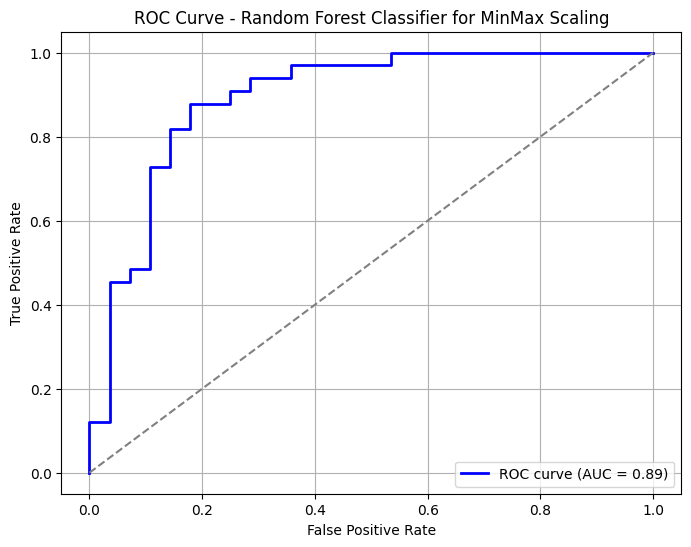

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier for MinMax Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

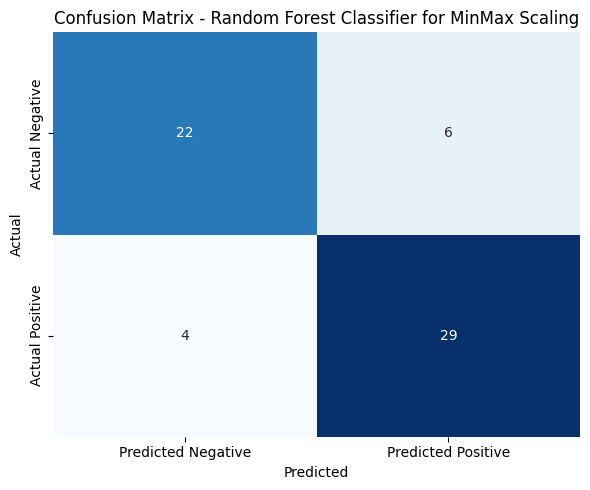

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test_minmax))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier for MinMax Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_rf = classification_report(y_test, best_rf.predict(X_test_minmax), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_rf['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_rf['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_rf['1']['f1-score'], 2)
accuracy = round(classification_report_dict_rf['accuracy'], 2)
auc_RF = round(auc(fpr, tpr), 2)

# Create a DataFrame for the metrics
metrics_rf_ms = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_RF]
})

print('Random Forest Classifier Performance for MinMax Scaling:')
# Print the DataFrame
print(metrics_rf_ms)

Random Forest Classifier Performance for MinMax Scaling:
                Metric  Value
0  Precision (Class 1)   0.83
1     Recall (Class 1)   0.88
2   F1-Score (Class 1)   0.85
3             Accuracy   0.84
4                  AUC   0.89


**[5] K-Nearest Neighbors (KNN) Model**

Standard Scaling

In [ ]:
# Define the base KNN model
knn_base = KNeighborsClassifier()

# Hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_base, param_grid_knn, X_train_standard, y_train)

print('KNN Optimal Hyperparameters:\n', best_knn_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_knn.predict(X_train_standard)))

KNN Optimal Hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       110
           1       0.83      0.89      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test_standard)))

# Calculate recall
KNN_recall = recall_score(y_test, best_knn.predict(X_test_standard))

print('K-Nearest Neighbors Model recall for Standard Scaling is: {:.2f}%'.format(KNN_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = best_knn.predict_proba(X_test_standard)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test, y_probs_KNN)

print('AUC - K-Nearest Neighbors Model for Standard Scaling: {:.2f}'.format(auc_KNN))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

K-Nearest Neighbors Model recall for Standard Scaling is: 81.82%
AUC - K-Nearest Neighbors Model for Standard Scaling: 0.85


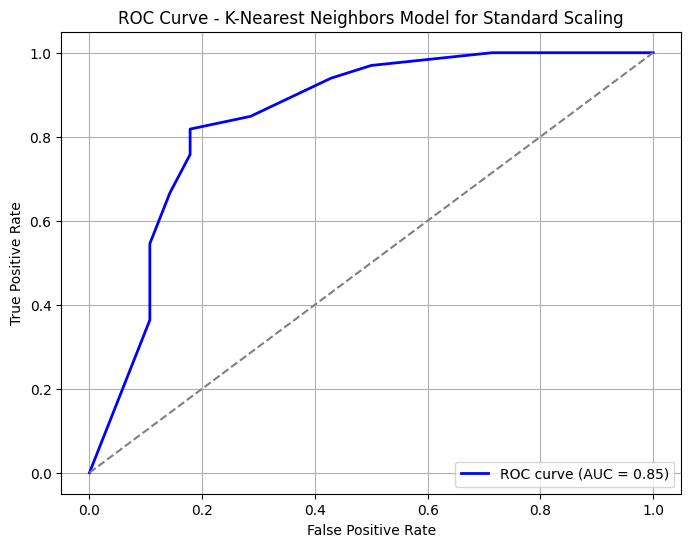

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors Model for Standard Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

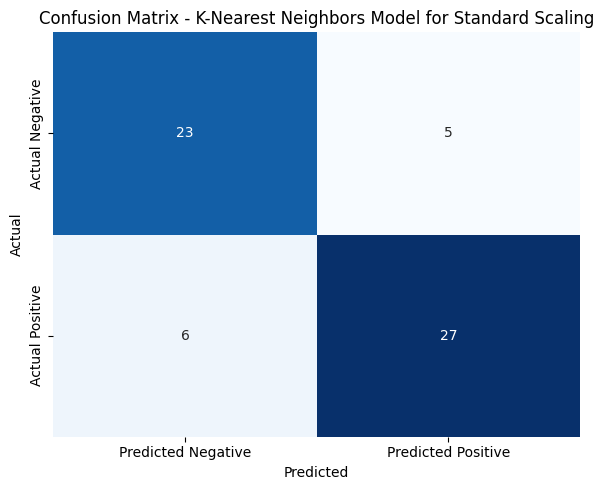

In [ ]:
# Generate confusion matrix
cm_knn = confusion_matrix(y_test, best_knn.predict(X_test_standard))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Model for Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_knn = classification_report(y_test, best_knn.predict(X_test_standard), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_knn['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_knn['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_knn['1']['f1-score'], 2)
accuracy = round(classification_report_dict_knn['accuracy'], 2)
auc_KNN = round(auc(fpr, tpr), 2)  # Corrected AUC calculation (it was incorrectly using auc_KNN before)

# Create a DataFrame for the metrics
metrics_knn_ss = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_KNN]
})

print('K-Nearest Neighbors Model Performance for Standard Scaling:')
# Print the DataFrame
print(metrics_knn_ss)

K-Nearest Neighbors Model Performance for Standard Scaling:
                Metric  Value
0  Precision (Class 1)   0.84
1     Recall (Class 1)   0.82
2   F1-Score (Class 1)   0.83
3             Accuracy   0.82
4                  AUC   0.85


MinMax Scaling

In [ ]:
# Define the base KNN model
knn_base = KNeighborsClassifier()

# Hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Tune using the same function as before (tune_clf_hyperparameters)
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_base, param_grid_knn, X_train_minmax, y_train)

print('KNN Optimal Hyperparameters:\n', best_knn_hyperparams)

# Training performance
print("Train Classification Report:\n", classification_report(y_train, best_knn.predict(X_train_minmax)))

KNN Optimal Hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.87      0.88      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [ ]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test_minmax)))

# Calculate recall
KNN_recall = recall_score(y_test, best_knn.predict(X_test_minmax))

print('K-Nearest Neighbors Model recall for MinMax Scaling is: {:.2f}%'.format(KNN_recall * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = best_knn.predict_proba(X_test_minmax)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test, y_probs_KNN)

print('AUC - K-Nearest Neighbors Model for MinMax Scaling: {:.2f}'.format(auc_KNN))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

K-Nearest Neighbors Model recall for MinMax Scaling is: 78.79%
AUC - K-Nearest Neighbors Model for MinMax Scaling: 0.82


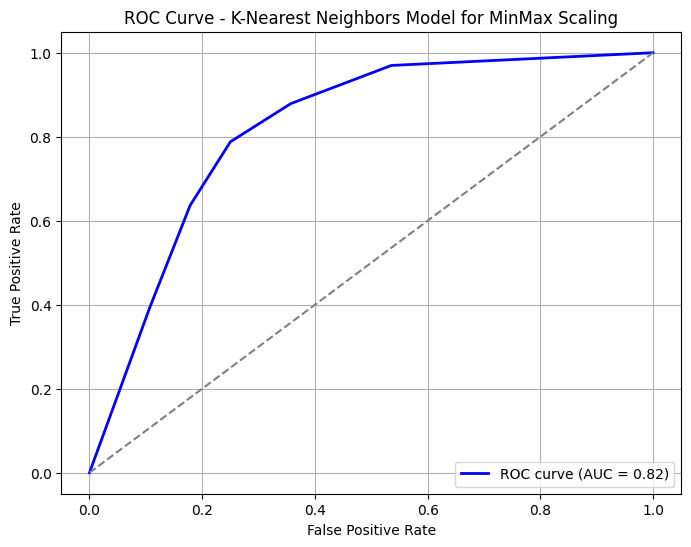

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors Model for MinMax Scaling')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

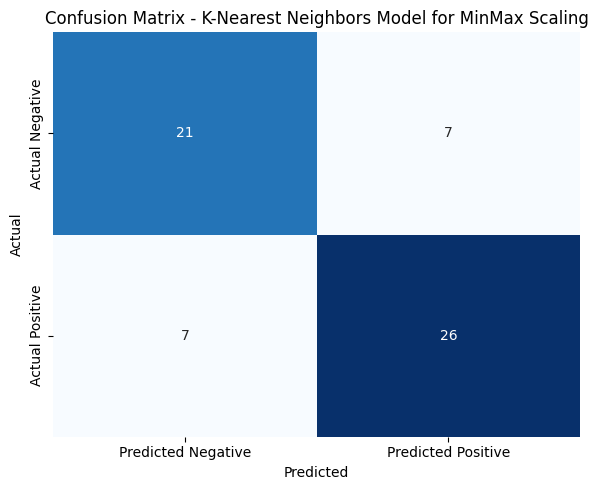

In [ ]:
# Generate confusion matrix
cm_knn = confusion_matrix(y_test, best_knn.predict(X_test_minmax))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Model for MinMax Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict_knn = classification_report(y_test, best_knn.predict(X_test_minmax), output_dict=True)

# Extract relevant metrics for class 1 (positive class)
precision_class_1 = round(classification_report_dict_knn['1']['precision'], 2)
recall_class_1 = round(classification_report_dict_knn['1']['recall'], 2)
f1_score_class_1 = round(classification_report_dict_knn['1']['f1-score'], 2)
accuracy = round(classification_report_dict_knn['accuracy'], 2)
auc_KNN = round(auc(fpr, tpr), 2)

# Create a DataFrame for the metrics
metrics_knn_ms = pd.DataFrame({
    'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'AUC'],
    'Value': [precision_class_1, recall_class_1, f1_score_class_1, accuracy, auc_KNN]
})

print('K-Nearest Neighbors Model Performance for MinMax Scaling:')
# Print the DataFrame
print(metrics_knn_ms)

K-Nearest Neighbors Model Performance for MinMax Scaling:
                Metric  Value
0  Precision (Class 1)   0.79
1     Recall (Class 1)   0.79
2   F1-Score (Class 1)   0.79
3             Accuracy   0.77
4                  AUC   0.82


In [ ]:
# Create an empty list to store all model metrics
model_metrics = []

# Logistic Regression
report_lr = classification_report(y_test, best_lr.predict(X_test_standard), output_dict=True)
precision_lr = round(report_lr['1']['precision'], 2)
recall_lr = round(report_lr['1']['recall'], 2)
f1_lr = round(report_lr['1']['f1-score'], 2)
accuracy_lr = round(accuracy_score(y_test, best_lr.predict(X_test_standard)), 2)
auc_lr = round(roc_auc_score(y_test, best_lr.predict_proba(X_test_standard)[:, 1]), 2)

model_metrics.append(['Logistic Regression', precision_lr, recall_lr, f1_lr, accuracy_lr, auc_lr])

# Decision Tree
report_dt = classification_report(y_test, best_dt.predict(X_test_standard), output_dict=True)
precision_dt = round(report_dt['1']['precision'], 2)
recall_dt = round(report_dt['1']['recall'], 2)
f1_dt = round(report_dt['1']['f1-score'], 2)
accuracy_dt = round(accuracy_score(y_test, best_dt.predict(X_test_standard)), 2)
auc_dt = round(roc_auc_score(y_test, best_dt.predict_proba(X_test_standard)[:, 1]), 2)

model_metrics.append(['Decision Tree', precision_dt, recall_dt, f1_dt, accuracy_dt, auc_dt])

# XGB Classifier
report_xgb = classification_report(y_test, best_xgb.predict(X_test_standard), output_dict=True)
precision_xgb = round(report_xgb['1']['precision'], 2)
recall_xgb = round(report_xgb['1']['recall'], 2)
f1_xgb = round(report_xgb['1']['f1-score'], 2)
accuracy_xgb = round(accuracy_score(y_test, best_xgb.predict(X_test_standard)), 2)
auc_xgb = round(roc_auc_score(y_test, best_xgb.predict_proba(X_test_standard)[:, 1]), 2)

model_metrics.append(['XGB Classifier', precision_xgb, recall_xgb, f1_xgb, accuracy_xgb, auc_xgb])

# Random Forest
report_rf = classification_report(y_test, best_rf.predict(X_test_standard), output_dict=True)
precision_rf = round(report_rf['1']['precision'], 2)
recall_rf = round(report_rf['1']['recall'], 2)
f1_rf = round(report_rf['1']['f1-score'], 2)
accuracy_rf = round(accuracy_score(y_test, best_rf.predict(X_test_standard)), 2)
auc_rf = round(roc_auc_score(y_test, best_rf.predict_proba(X_test_standard)[:, 1]), 2)

model_metrics.append(['Random Forest', precision_rf, recall_rf, f1_rf, accuracy_rf, auc_rf])

# K-Nearest Neighbors
report_knn = classification_report(y_test, best_knn.predict(X_test_standard), output_dict=True)
precision_knn = round(report_knn['1']['precision'], 2)
recall_knn = round(report_knn['1']['recall'], 2)
f1_knn = round(report_knn['1']['f1-score'], 2)
accuracy_knn = round(accuracy_score(y_test, best_knn.predict(X_test_standard)), 2)
auc_knn = round(roc_auc_score(y_test, best_knn.predict_proba(X_test_standard)[:, 1]), 2)

model_metrics.append(['KNeighbors Classifier', precision_knn, recall_knn, f1_knn, accuracy_knn, auc_knn])

# Create a DataFrame
metrics_table = pd.DataFrame(model_metrics, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'])

# Display the table
print('Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Standard Scaling:')
print(metrics_table)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Standard Scaling:
                   Model  Precision  Recall  F1-Score  Accuracy   AUC
0    Logistic Regression       0.79    0.94      0.86      0.84  0.89
1          Decision Tree       0.76    0.97      0.85      0.82  0.85
2         XGB Classifier       0.79    0.79      0.79      0.77  0.89
3          Random Forest       0.85    0.85      0.85      0.84  0.87
4  KNeighbors Classifier       0.81    0.79      0.80      0.79  0.82


In [ ]:
# Create an empty list to store all model metrics
model_metrics_minmax = []

# Logistic Regression
report_lr = classification_report(y_test, best_lr.predict(X_test_minmax), output_dict=True)
precision_lr = round(report_lr['1']['precision'], 2)
recall_lr = round(report_lr['1']['recall'], 2)
f1_lr = round(report_lr['1']['f1-score'], 2)
accuracy_lr = round(accuracy_score(y_test, best_lr.predict(X_test_minmax)), 2)
auc_lr = round(roc_auc_score(y_test, best_lr.predict_proba(X_test_minmax)[:, 1]), 2)

model_metrics_minmax.append(['Logistic Regression', precision_lr, recall_lr, f1_lr, accuracy_lr, auc_lr])

# Decision Tree
report_dt = classification_report(y_test, best_dt.predict(X_test_minmax), output_dict=True)
precision_dt = round(report_dt['1']['precision'], 2)
recall_dt = round(report_dt['1']['recall'], 2)
f1_dt = round(report_dt['1']['f1-score'], 2)
accuracy_dt = round(accuracy_score(y_test, best_dt.predict(X_test_minmax)), 2)
auc_dt = round(roc_auc_score(y_test, best_dt.predict_proba(X_test_minmax)[:, 1]), 2)

model_metrics_minmax.append(['Decision Tree', precision_dt, recall_dt, f1_dt, accuracy_dt, auc_dt])

# XGB Classifier
report_xgb = classification_report(y_test, best_xgb.predict(X_test_minmax), output_dict=True)
precision_xgb = round(report_xgb['1']['precision'], 2)
recall_xgb = round(report_xgb['1']['recall'], 2)
f1_xgb = round(report_xgb['1']['f1-score'], 2)
accuracy_xgb = round(accuracy_score(y_test, best_xgb.predict(X_test_minmax)), 2)
auc_xgb = round(roc_auc_score(y_test, best_xgb.predict_proba(X_test_minmax)[:, 1]), 2)

model_metrics_minmax.append(['XGB Classifier', precision_xgb, recall_xgb, f1_xgb, accuracy_xgb, auc_xgb])

# Random Forest
report_rf = classification_report(y_test, best_rf.predict(X_test_minmax), output_dict=True)
precision_rf = round(report_rf['1']['precision'], 2)
recall_rf = round(report_rf['1']['recall'], 2)
f1_rf = round(report_rf['1']['f1-score'], 2)
accuracy_rf = round(accuracy_score(y_test, best_rf.predict(X_test_minmax)), 2)
auc_rf = round(roc_auc_score(y_test, best_rf.predict_proba(X_test_minmax)[:, 1]), 2)

model_metrics_minmax.append(['Random Forest', precision_rf, recall_rf, f1_rf, accuracy_rf, auc_rf])

# K-Nearest Neighbors
report_knn = classification_report(y_test, best_knn.predict(X_test_minmax), output_dict=True)
precision_knn = round(report_knn['1']['precision'], 2)
recall_knn = round(report_knn['1']['recall'], 2)
f1_knn = round(report_knn['1']['f1-score'], 2)
accuracy_knn = round(accuracy_score(y_test, best_knn.predict(X_test_minmax)), 2)
auc_knn = round(roc_auc_score(y_test, best_knn.predict_proba(X_test_minmax)[:, 1]), 2)

model_metrics_minmax.append(['KNeighbors Classifier', precision_knn, recall_knn, f1_knn, accuracy_knn, auc_knn])

# Create a DataFrame
metrics_table_minmax = pd.DataFrame(model_metrics_minmax, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'])

# Display the table
print('Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for MinMax Scaling:')
print(metrics_table_minmax)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for MinMax Scaling:
                   Model  Precision  Recall  F1-Score  Accuracy   AUC
0    Logistic Regression       0.82    0.85      0.84      0.82  0.89
1          Decision Tree       0.76    0.97      0.85      0.82  0.82
2         XGB Classifier       0.79    0.94      0.86      0.84  0.90
3          Random Forest       0.83    0.88      0.85      0.84  0.89
4  KNeighbors Classifier       0.79    0.79      0.79      0.77  0.82


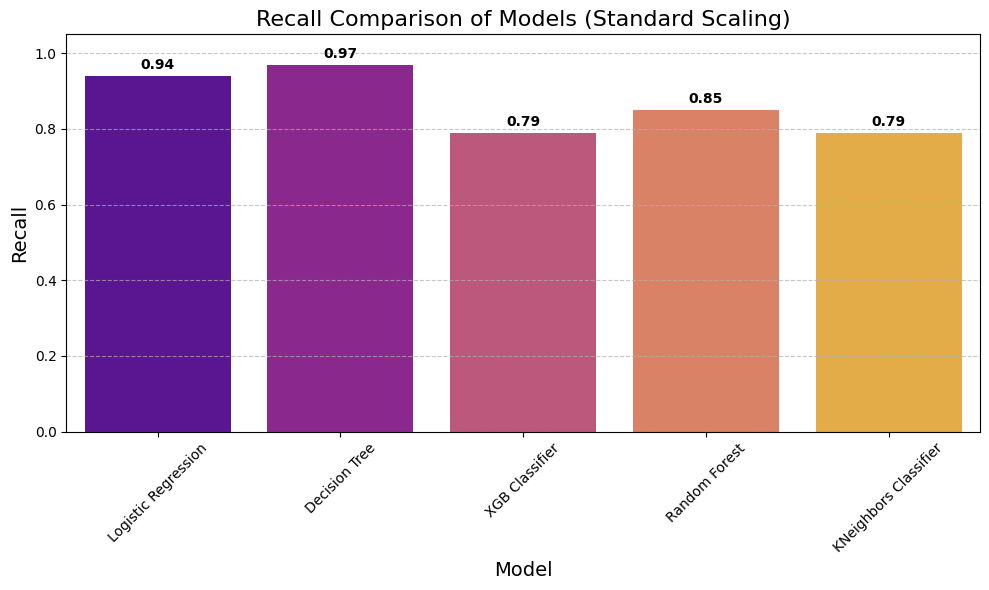

In [ ]:
# Plotting Recall Comparison Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_table, palette='plasma')

# Add recall values on top of the bars
for i, value in enumerate(metrics_table['Recall']):
    plt.text(i, value + 0.01, str(value), ha='center', va='bottom', fontweight='bold')

plt.title('Recall Comparison of Models (Standard Scaling)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

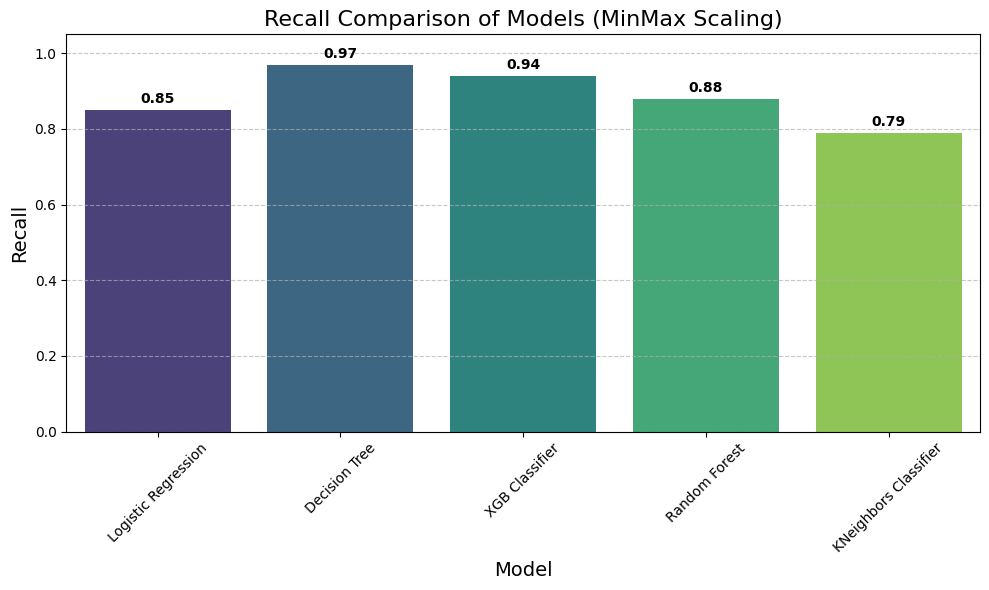

In [ ]:
# Plotting Recall Comparison Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_table_minmax, palette='viridis')

# Add values on top of bars
for i, value in enumerate(metrics_table_minmax['Recall']):
    plt.text(i, value + 0.01, str(value), ha='center', va='bottom', fontweight='bold')

plt.title('Recall Comparison of Models (MinMax Scaling)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1.05)  # Recall ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()